In [1]:
from pathlib import Path # Manage folders and files
import rasterio as rio # Reads and writes geospatial raster data
from matplotlib import pyplot as plt # Display plots and images
import numpy as np # Multi-dimensional arrays
import sap # To create morphological trees

# Max-tree and attribute filtering

![](img/max_pruning.png)

## 0. Setup: Load the DSM tile

- Load the dsm tile `tile_path` 

In [2]:
dsm_data = rio.open('data/dsm_vox_50cm_tile_-12_0.tif')
dsm = dsm_data.read()[0]

In [3]:
# Rasterio to read TIFF metadata:
print('''
Shape: {} 
Bounds: {}
Resolution: {}
CRS: {}
'''.format(dsm_data.shape, dsm_data.bounds, dsm_data.res, dsm_data.crs))


Shape: (2001, 2001) 
Bounds: BoundingBox(left=597220.0, bottom=5328810.0, right=598220.5, top=5329810.5)
Resolution: (0.5, 0.5)
CRS: EPSG:32630



## 1. Create the max-tree of the DSM with the Python package `sap`

- Create the max-tree of `dsm` (tip: don't forget that you can display docstrings with `?<package>`!)
- How many nodes have the max-tree?

In [4]:
# Your turn!

#maxTree = sap.MaxTree(dsm)
#maxTree

In [5]:
small_dsm = dsm[:500,:500].copy()
small_dsm.shape


maxTree = sap.MaxTree(small_dsm)
maxTree

MaxTree{'adjacency': 4,
 'image.dtype': dtype('float64'),
 'image.shape': (500, 500),
 'image_hash': '93e36bcb',
 'image_name': None,
 'num_nodes': 385199}

## 2. Compute some attributes on the max-tree

- Get the nodes `area` attribute in a vector.
- Get the nodes `compactness` attributes.
- What is the size of the attribute vectors? Why?

In [6]:
area = maxTree.get_attribute('area')
area.shape

(385199,)

In [7]:
compactness = maxTree.get_attribute('compactness')

In [8]:
maxTree.available_attributes()

{'area': ['vertex_area=None', 'leaf_graph=None'],
 'child_number': [],
 'children_pair_sum_product': ['node_weights'],
 'compactness': ['area=None',
  'contour_length=None',
  'normalize=True',
  'leaf_graph=None'],
 'contour_length': ['vertex_perimeter=None',
  'edge_length=None',
  'leaf_graph=None'],
 'contour_strength': ['edge_weights',
  'vertex_perimeter=None',
  'edge_length=None',
  'leaf_graph=None'],
 'depth': [],
 'dynamics': ['altitudes', "increasing_altitudes='auto'"],
 'extinction_value': ['altitudes', 'attribute', "increasing_altitudes='auto'"],
 'extrema': ['altitudes'],
 'frontier_length': ['edge_length=None', 'leaf_graph=None'],
 'frontier_strength': ['edge_weights', 'leaf_graph'],
 'gaussian_region_weights_model': ['vertex_weights', 'leaf_graph=None'],
 'height': ['altitudes', "increasing_altitudes='auto'"],
 'lca_map': ['leaf_graph'],
 'mean_vertex_weights': ['vertex_weights', 'area=None', 'leaf_graph=None'],
 'moment_of_inertia': ['leaf_graph'],
 'piecewise_constan

## 3. Filter the DSM with attribute filtering!

We'll filter the DTM with a threshold on the area attributes.

+ Choose an area threshold
+ Get the vector of deleted nodes
+ Filter the tree according to the vector of deleted nodes
+ Display!

[1.00000e+00 1.00000e+00 1.00000e+00 ... 2.49998e+05 2.49999e+05
 2.50000e+05]
[ True  True  True ... False False False]
(500, 500)


Text(0.5, 1.0, 'Difference')

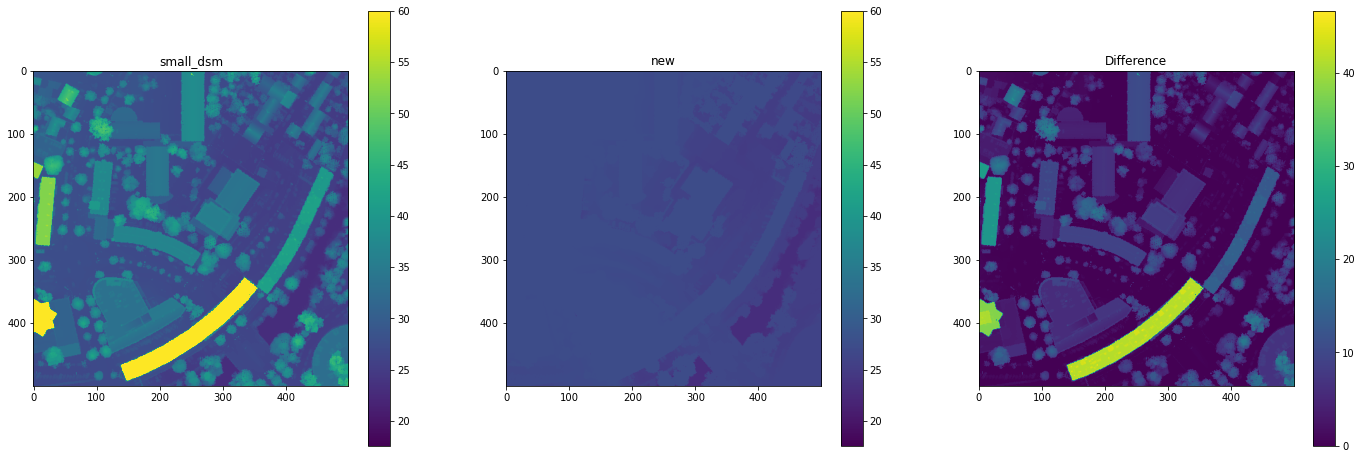

In [9]:
# Your turn!
thresh = 100000
print(area)

deleted = area < thresh
print(deleted)

new = maxTree.reconstruct(deleted)
print(new.shape)

plt.figure(figsize=(24, 8))

plt.subplot(1,3,1)
plt.imshow(small_dsm,vmax=60)
plt.colorbar()
plt.title('small_dsm')

plt.subplot(1,3,2)
plt.imshow(new, vmax=60)
plt.colorbar()
plt.title('new')

plt.subplot(1,3,3)
plt.imshow(small_dsm - new)
plt.colorbar()
plt.title('Difference')
